### Monte Carlo: Discretização de Euler

In [2]:
# Carregando as bibliotecas necessárias:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Carregando os dados do ativo:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

data.tail()

,PG
Date,
2017-03-15,78.513802
2017-03-16,78.548172
2017-03-17,78.170174
2017-03-20,78.359161
2017-03-21,78.333389


In [6]:
# Calculando os retornos diarios do ativo:
log_returns = np.log(1 + data.pct_change())

log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000438
2017-03-17,-0.004824
2017-03-20,0.002415
2017-03-21,-0.000329


Discretização de Euler:
> St = St-1 * e ^ ((r - 1/2 * stdev ^ 2) deltat + stdev * deltat ^ 1/2 * Zt)

In [7]:
# Taxa Livre de Risco:
r = 0.025

In [36]:
# Desvio-padrão dos retornos ao ano:
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values # transforma o desvio-padrão em um objeto array

In [37]:
T = 1 # horizonte de tempo a ser simulado - 1 ano
t_intervals = 250 # numero de dias dentro do horizonte de tempo a ser simulado
delta_t = T / t_intervals # intervalo de tempo fixo a ser simulado

In [38]:
iterations = 10000 # quantas vezes queremos simular o componente aleatório Z
# o componente Z será uma matriz com componentes aleatórios extraídos de uma distribuição normar padronizada - média 0 e desvio-padrão 1

Z = np.random.standard_normal((t_intervals + 1, iterations)) # gera a matriz de componentes Z
# np.random.standard_normal() - gera a distribuição normal padronizada

Z

array([[-1.29691675, -0.53615837, -0.8230123 , ...,  0.18853528,
        -0.73793507,  0.44739927],
       [-1.52897235,  0.0171237 ,  0.21179164, ...,  1.26266899,
        -0.92496682,  0.49291911],
       [ 0.70809055, -0.1641273 , -1.53072813, ...,  0.41129605,
        -0.19189604, -0.62837485],
       ...,
       [-1.01814163,  1.3830893 ,  0.26245428, ..., -1.20620723,
        -0.41193802, -0.94341438],
       [ 1.87600093,  0.52745108,  0.74080286, ..., -0.18753571,
        -1.65964929, -1.2847434 ],
       [ 0.39890607, -0.31193034,  1.23309347, ..., -0.44757557,
         0.89111855,  0.04130324]])

In [39]:
S = np.zeros_like(Z) # gera uma matriz que receberá os valores simulados para as opções das mesma dimensões que o matriz dos componentes Z

S0 = data.iloc[-1] # atribui o preço mais rescente do ativo como valor anterior do ativo para a fórmula

S[0] = S0 # atribui o valor anterior do ativo como valor inicial dos preços das opções a serem simulados

S

array([[78.33338928, 78.33338928, 78.33338928, ..., 78.33338928,
        78.33338928, 78.33338928],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
# Gerando a matriz com as simulações dos valores futuros para as opções com um loop de 1 a t_intervals + 1:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
    
S

array([[78.33338928, 78.33338928, 78.33338928, ..., 78.33338928,
        78.33338928, 78.33338928],
       [77.01029164, 78.35131899, 78.52181376, ..., 79.44862461,
        77.53143024, 78.7686868 ],
       [77.62451411, 78.21080546, 77.1940201 , ..., 79.81734044,
        77.36839405, 78.2208909 ],
       ...,
       [72.29513851, 61.83287589, 77.14630203, ..., 80.97584381,
        74.178021  , 76.68061736],
       [73.8282908 , 62.2004592 , 77.79001817, ..., 80.80949887,
        72.8187796 , 75.59129751],
       [74.16066243, 61.98652504, 78.87146664, ..., 80.40967809,
        73.54973082, 75.62901584]])

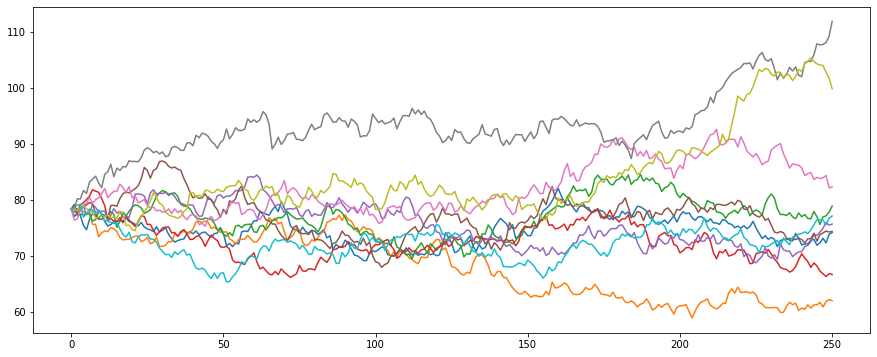

In [42]:
# Plotando um gráfico com 10 das iterações geradas:
plt.figure(figsize=(15,6))
plt.plot(S[:, :10])
plt.show()

Calculando o Payoff da Opção de Compra:

In [43]:
# Gerando os Payoffs:
p = np.maximum(S[-1] - 110, 0)
# np.maximum() - cria um array de zeros ou numeros iguais às diferenças
# S[-1] - último preço simulado para os opções
# 110 - preço de exercício da opção

p

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
# Cálculo do Payoff da Opção de Compra:
C = np.exp(-r * T) * np.sum(p) / iterations

C

0.27508037765648036